# Business Case Study

### Used Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
import math
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

### 1 - Problem (case study)

* Data Description - the data was derived from a .csv file containing Customer Marketing analysis
* Goal - The goal is to Predict the Net return of a Business

### 2 - Getting Data

* Read the .csv file

In [3]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info
data.shape

(9134, 24)

### Global variables

In [5]:
discrete_values = pd.DataFrame()
continuous_values = pd.DataFrame()
categorical_values = pd.DataFrame()

numerical_clean = pd.DataFrame()
categorical_clean = pd.DataFrame()

### 3 - Cleaning/Wrangling/EDA

* Change headers names.
* Deal with NaN values.
* Categorical Features.
* Numerical Features.
* Exploration.

#### Data cleaning Activities

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [6]:
def check_dataypes(data):
    numerical_discrete = data.select_dtypes(np.number)
    categorical = data.select_dtypes(object)
    
    # removing insignificant colomns from the numerical coloumns
    #categorical = categorical.drop(coloumns = ['customer','effective_to_date'], axis=1)
    
    return numerical_discrete,categorical

In [7]:
discrete_values,categorical_values = check_dataypes(data)

In [8]:
def clean_data_basic(discrete_values,categorical_values):
    
    #replace missing numericals with medians
    #replace missing categoricals with mode
    for col in discrete_values.columns:
        discrete_values[col] = discrete_values[col].fillna(np.median(discrete_values[col]))
    for col in categorical_values.columns:
        categorical_values[col] = categorical_values[col].fillna(categorical_values[col].mode())
     
    #standardise header names
    discrete_df = discrete_values.rename(columns=str.lower)
    discrete_df.columns = discrete_df.columns.str.replace(' ', '_')
    discrete_df.drop_duplicates() 
    cat_df = categorical_values.rename(columns=str.lower) 
    cat_df.columns = cat_df.columns.str.replace(' ', '_')
    cat_df.drop_duplicates() 
       
    return discrete_df,cat_df

In [9]:
numerical_clean,categorical_clean = clean_data_basic(discrete_values,categorical_values)

In [10]:
clean_df = pd.concat([numerical_clean, categorical_clean],axis=1)
clean_df = clean_df.drop(columns = ['customer'],axis=1)

### Exploration

Show a plot of the total number of responses

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

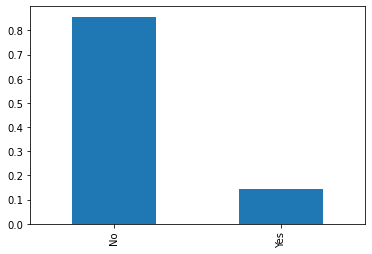

In [11]:
display(clean_df['response'].unique())
clean_df['response'].value_counts(normalize=True).plot(kind='bar') # in percentage of the distribution

Show a plot of the response rate by the sales channel

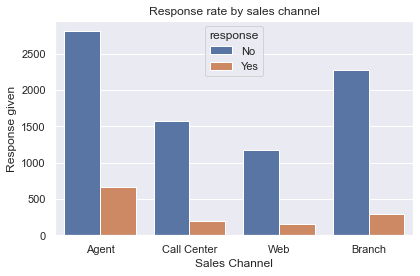

In [12]:
sns.set()
sns.countplot(data=clean_df, x="sales_channel", hue="response")
plt.title("Response rate by sales channel")
plt.ylabel("Response given")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()


### 4 - Processing Data

In [13]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


### * Dealing with outliers.

Show a plot of the response rate by income

Here I have tried to visualise the data with Box plots. From Tableau we understood that a Dimension like "Response" can be used to split the measurement like "Income"

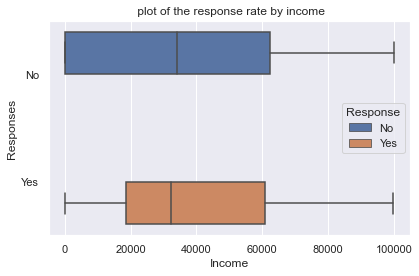

In [14]:
sns.set()
sns.boxplot(x = 'Income',y='Response', hue = "Response", data=data)
plt.title(" plot of the response rate by income")
plt.ylabel("Responses")
plt.xlabel("Income")
plt.tight_layout()
plt.show()

# seems like there are not much outliers


### * Normalization.

Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables

In [15]:
# plotting the discrete values
def plot_numerical(data):
    for col in data.columns:
        sns.set()
        sns.displot(x=clean_df[col])


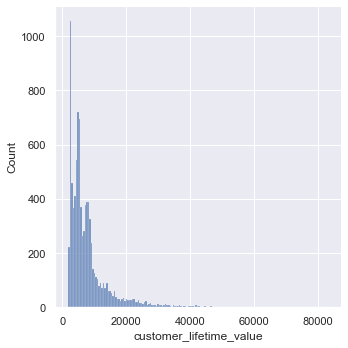

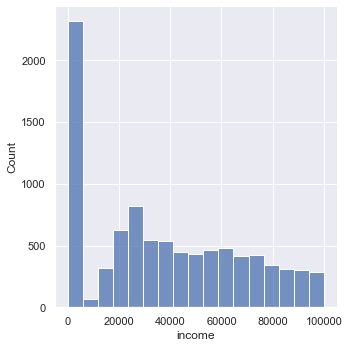

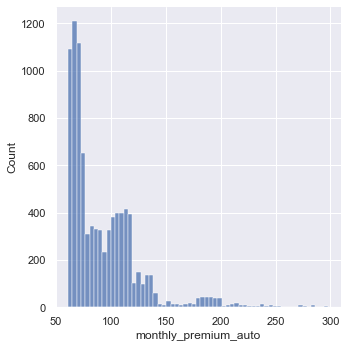

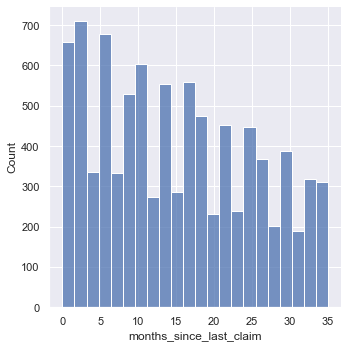

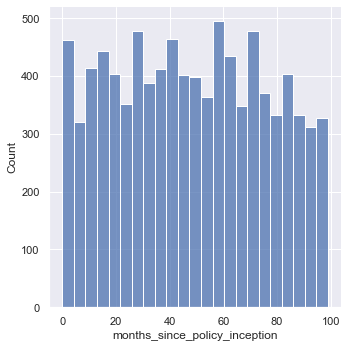

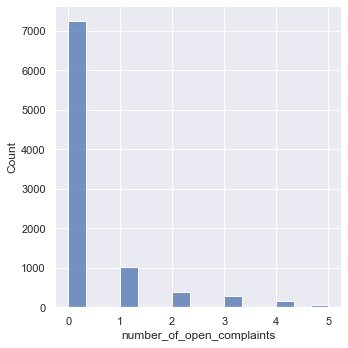

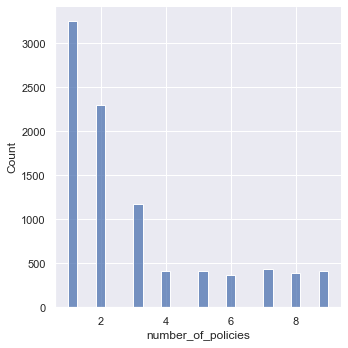

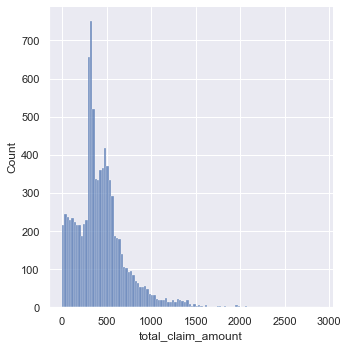

In [16]:
plot_numerical(numerical_clean)

- Do the distributions for different numerical variables look like a normal distribution ? No.they are not symmetrical like the normal distributions

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [17]:
# this can be done using a Heat map on the Numerical data set minus the 'total_claim_amount'

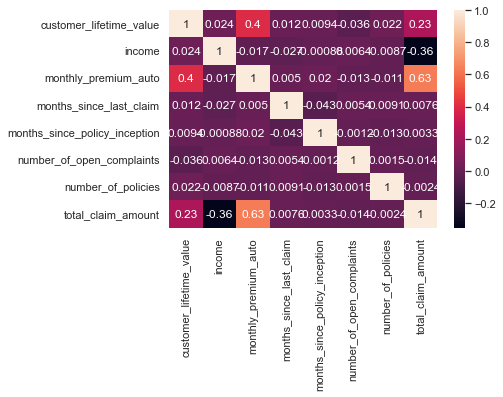

In [18]:
correlations_matrix = numerical_clean.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

it seems there is none of the values that are highy correlated (either 0.9 or -0.9)

* Processing

In [19]:
y = numerical_clean['total_claim_amount']
X = numerical_clean.drop(['total_claim_amount'], axis=1)



In [20]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X)
x_standardized = transformer.transform(X)
x_standardized_df = pd.DataFrame(x_standardized, columns=X.columns)

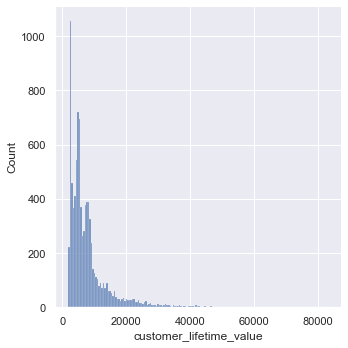

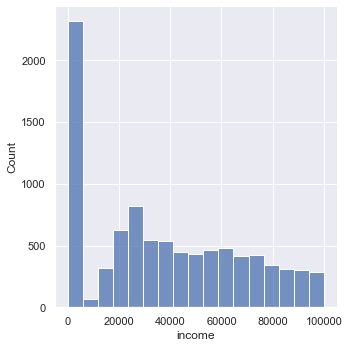

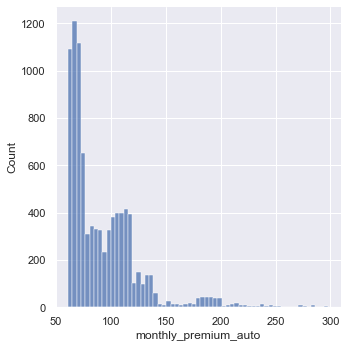

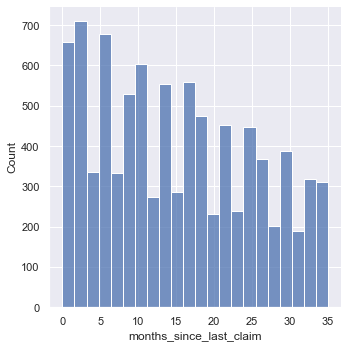

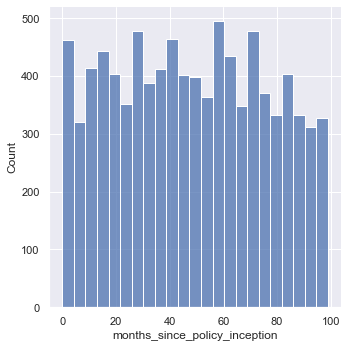

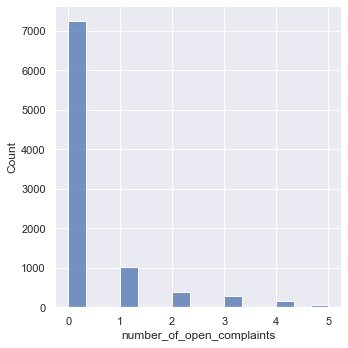

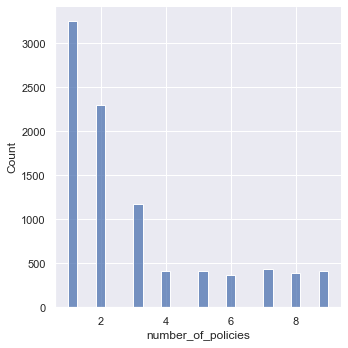

In [21]:
# we will replot the normalised data to inspect
# this can be done using Normalizer
plot_numerical(x_standardized_df)

In [22]:
print(f"Mean: {round(x_standardized.mean())}")
print(f"Standard Deviation: {round(x_standardized.std())}")

Mean: 0
Standard Deviation: 1


### * Encoding Categorical Data.

In [23]:
categorical_clean.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
#as we can see customer and date will make this complicated.. so we will drop them and use only the rest for hot encoding
categorical_values_to_hot_encode = categorical_clean.drop(['customer','effective_to_date'], axis=1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
# OneHot Encoding
# Convert categorial columns into multiple numerical columns.
encoder = OneHotEncoder()
encoder.fit(categorical_values_to_hot_encode)
encoded = encoder.transform(categorical_values_to_hot_encode).toarray()
onehot_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

* Update X values after processing

In [26]:
# Concatenating standardised numerical columns with one-hot-encoded columns
X = pd.concat([x_standardized_df, onehot_encoded_df], axis=1)

### * Splitting into train set and test set.

In [27]:
def split_train_test(X,y,test_size,random_state):
    X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=test_size, random_state=random_state)
    return X_train,X_test,y_train,y_test

### 5 - Modeling

* Apply model

### 6 - Model Validation

* R2
* MSE
* RMSE
* MAE

In [62]:
def regression_modeller_validator(X, y, test_size,random_state):
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    
    #Model Fitting
    X_train,X_test,y_train,y_test = split_train_test( X, y, test_size,random_state)#splitting
    lm = LinearRegression()#fitting
    lm.fit(X_train,y_train)
    y_pred_train = lm.predict(X_train)# Predicting
    print("y predicted from train")
    print(y_pred_train)
    #print(f"y training model predicted: {y_pred_train}")
    
    #validating the training set with R^2
    print("R2 score training")
    print(r2_score(y_train, y_pred_train))
    #print(f"R2 score training: {r2_score(y_test, y_pred_test)}")
        
    #validating the Test set with R^2
    y_pred_test = lm.predict(X_test)
    r2_score(y_test, y_pred_test)
    print(f"y test predicted: {y_pred_train}")
    print(f"R2 score testing: {r2_score(y_test, y_pred_test)}")
    
    mse = mean_squared_error(y_test, y_pred_test)
    print(f"MSE Test: {mse}")
    
    rmse = math.sqrt(mse)
    print(f"RMSE Test: {rmse}")
    
    # Comptuing the RMSE -> root mean squared error.
    #np.sqrt(mean_squared_error(y_test,y_pred_test))
    
    #rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
    #rmse
    
    #mae = mean_absolute_error(y_test, y_pred_test)
 
    
    

In [63]:
regression_modeller_validator(X, y, 0.30, 45)

y predicted from train
[310. 469. 560. ... 162. 548. 424.]
R2 score training
0.7687558169090241
y test predicted: [310. 469. 560. ... 162. 548. 424.]
R2 score testing: 0.7794186307567315
MSE Test: 19086.641243981816
RMSE Test: 138.15441087414408


### 7 - Reporting

#### Conclusion

##### 1. Regression Model with test_size=0.30,random_state=45 MinMax Scalar 

R2 Train = 1.0
R2 Test  = 0.9914

##### 2.Regression Model with test_size=0.20,random_state=0, Power Transformation

R2 Train = 1.0
R2 Test  = 0.99146

#### Resources

Scalars: https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler